# Try to figure out FluidSim

[installation](https://fluidsim.readthedocs.io/en/latest/install.html) 
```bash
pip install pip -U
pip install fluidsim
```

For pseudospectral solvers?
```bash
pip install "fluidsim[fft]"
```

Can install more optional(?) stuff. Refer to above link if you happen to need it.

Test
```bash
pytest --pyargs fluidsim
```
Apparently need to [install pytest](https://docs.pytest.org/en/6.2.x/getting-started.html)?<br>
So the test is not working, got these two errors
```
ERROR util/scripts/test_modif_resolution.py - pytest.PytestRemovedIn9Warning: Marks applied to fixtures have no effect
ERROR util/scripts/test_restart.py - pytest.PytestRemovedIn9Warning: Marks applied to fixtures have no effect
```
I'm not gonna try to understand them, hopefully I can just move on.

## Tutorial: running a simulation (user perspective)
from [here](https://fluidsim.readthedocs.io/en/latest/ipynb/tuto_user.html)<br>
They apparently solving 2D Navier-Stokes equations so seems applicable!

In [1]:
from __future__ import print_function

%matplotlib inline
import fluidsim

In [3]:
from fluidsim.solvers.ns2d.solver import Simul
params = Simul.create_default_params()

In [4]:
params


<params NEW_DIR_RESULTS="True" ONLY_COARSE_OPER="False" beta="0.0" nu_2="0.0"
        nu_4="0.0" nu_8="0.0" nu_m4="0.0" short_name_type_run="">
  <oper Lx="8" Ly="8" NO_KY0="False" NO_SHEAR_MODES="False"
        coef_dealiasing="0.6666666666666666" nx="48" ny="48"
        truncation_shape="cubic" type_fft="default"/>  

  <time_stepping USE_CFL="True" USE_T_END="True" cfl_coef="None" deltat0="0.2"
                 deltat_max="0.2" it_end="10" max_elapsed="None" t_end="10.0"
                 type_time_scheme="RK4">
    <phaseshift_random nb_pairs="1" nb_steps_compute_new_pair="None"/>  

  </time_stepping>

  <init_fields available_types="['from_file', 'from_simul', 'in_script',
               'constant', 'noise', 'jet', 'dipole']" modif_after_init="False"
               type="constant">
    <from_file path=""/>  

    <constant value="1.0"/>  

    <noise length="0.0" velo_max="1.0"/>  

  </init_fields>

  <forcing available_types="['in_script', 'in_script_coarse', 'pseudo_spectral',

In [5]:
sim = Simul(params)

*************************************
Program fluidsim
sim:                <class 'fluidsim.solvers.ns2d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns2d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators2d.OperatorsPseudoSpectral2D'>
sim.state:          <class 'fluidsim.solvers.ns2d.state.StateNS2D'>
sim.time_stepping:  <class 'fluidsim.base.time_stepping.pseudo_spect.TimeSteppingPseudoSpectral'>
sim.init_fields:    <class 'fluidsim.solvers.ns2d.init_fields.InitFieldsNS2D'>

solver NS2D, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =     48 ; ny =     48
lx = 8 ; ly = 8
path_run =
/home/jovyan/Sim_data/NS2D_48x48_S8x8_2025-11-18_05-12-15
init_fields.type: constant

Initialization outputs:
sim.output.increments:        <class 'fluidsim.base.output.increments.Increments'>
sim.output.phys_fields:       <class 'fluidsim.base.output.phys_fields2d.PhysFieldsBase2D'>
sim.output.spatial_means:     <class 'fluidsim.solvers.ns2d.output.spatia

In [6]:
sim.time_stepping.start()

*************************************
Beginning of the computation
save state_phys in file state_phys_t0000.000.nc
    compute until t =         10
it =      0 ; t =            0 ; deltat  =   0.083333
              energy = 0.000e+00 ; Delta energy = +0.000e+00

MEMORY_USAGE:                  234.8359375 Mo
it =      6 ; t =      1.08333 ; deltat  =        0.2
              energy = 0.000e+00 ; Delta energy = +0.000e+00
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  234.8359375 Mo
it =     11 ; t =      2.08333 ; deltat  =        0.2
              energy = 0.000e+00 ; Delta energy = +0.000e+00
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  234.8359375 Mo
it =     16 ; t =      3.08333 ; deltat  =        0.2
              energy = 0.000e+00 ; Delta energy = +0.000e+00
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  234.8359375 Mo
it =     21 ; t =      4.08333 ; deltat  =      

In [7]:
# will understand sooon, but first delete results?
import shutil

shutil.rmtree(sim.output.path_run)

### Importing a Solver

In [8]:
Simul = fluidsim.import_simul_class_from_key("ns2d")

In [9]:
params = Simul.create_default_params()

In [10]:
[attr for attr in dir(params) if not attr.startswith("_")]

['NEW_DIR_RESULTS',
 'ONLY_COARSE_OPER',
 'beta',
 'forcing',
 'init_fields',
 'nu_2',
 'nu_4',
 'nu_8',
 'nu_m4',
 'oper',
 'output',
 'preprocess',
 'short_name_type_run',
 'time_stepping']

In [11]:
[
    attr
    for attr in dir(params)
    if attr.startswith("_") and not attr.startswith("__")
]

['_ParamContainer__make_lines_code',
 '_as_code',
 '_contains_doc',
 '_create_params',
 '_doc',
 '_get_formatted_doc',
 '_get_formatted_docs',
 '_get_key_attribs',
 '_key_attribs',
 '_load_from_elemxml',
 '_load_from_hdf5_file',
 '_load_from_hdf5_object',
 '_load_from_xml_file',
 '_load_info_solver',
 '_load_params_simul',
 '_make_dict',
 '_make_dict_attribs',
 '_make_dict_tree',
 '_make_element_xml',
 '_make_full_tag',
 '_make_xml_text',
 '_modif_from_other_params',
 '_parent',
 '_pop_attrib',
 '_print_as_code',
 '_print_as_xml',
 '_print_doc',
 '_print_docs',
 '_repr_json_',
 '_save_as_hdf5',
 '_save_as_xml',
 '_set_as_child',
 '_set_attrib',
 '_set_attribs',
 '_set_child',
 '_set_doc',
 '_set_internal_attr',
 '_tag',
 '_tag_children']

In [12]:
# some attributes are simple objects, others can be other classes?
print(type(params.nu_2))
print(type(params.output))

<class 'float'>
<class 'fluidsim_core.params.Parameters'>


In [13]:
[attr for attr in dir(params.output) if not attr.startswith("_")]

['HAS_TO_SAVE',
 'ONLINE_PLOT_OK',
 'increments',
 'period_refresh_plots',
 'periods_plot',
 'periods_print',
 'periods_save',
 'phys_fields',
 'spatial_means',
 'spatiotemporal_spectra',
 'spect_energy_budg',
 'spectra',
 'spectra_multidim',
 'sub_directory',
 'temporal_spectra']

In [14]:
# tree of parameters can be represented as xml code
print(params)


<params NEW_DIR_RESULTS="True" ONLY_COARSE_OPER="False" beta="0.0" nu_2="0.0"
        nu_4="0.0" nu_8="0.0" nu_m4="0.0" short_name_type_run="">
  <oper Lx="8" Ly="8" NO_KY0="False" NO_SHEAR_MODES="False"
        coef_dealiasing="0.6666666666666666" nx="48" ny="48"
        truncation_shape="cubic" type_fft="default"/>  

  <time_stepping USE_CFL="True" USE_T_END="True" cfl_coef="None" deltat0="0.2"
                 deltat_max="0.2" it_end="10" max_elapsed="None" t_end="10.0"
                 type_time_scheme="RK4">
    <phaseshift_random nb_pairs="1" nb_steps_compute_new_pair="None"/>  

  </time_stepping>

  <init_fields available_types="['from_file', 'from_simul', 'in_script',
               'constant', 'noise', 'jet', 'dipole']" modif_after_init="False"
               type="constant">
    <from_file path=""/>  

    <constant value="1.0"/>  

    <noise length="0.0" velo_max="1.0"/>  

  </init_fields>

  <forcing available_types="['in_script', 'in_script_coarse', 'pseudo_spectral',

In [15]:
# you can change parameters
params.nu_2 = 1e-3
params.forcing.enable = False

params.init_fields.type = "noise"

params.output.periods_save.spatial_means = 1.0
params.output.periods_save.spectra = 1.0
params.output.periods_save.phys_fields = 2.0

In [16]:
# cannot accidentally cretae a parameter
try:
    params.this_param_does_not_exit = 10
except AttributeError as e:
    print("AttributeError:", e)

AttributeError: this_param_does_not_exit is not already set in params.
The attributes are: ['NEW_DIR_RESULTS', 'ONLY_COARSE_OPER', 'beta', 'nu_2', 'nu_4', 'nu_8', 'nu_m4', 'short_name_type_run']
To set a new attribute, use _set_attrib or _set_attribs.


In [17]:
# cannot use nonexistent parameter
try:
    print(params.this_param_does_not_exit)
except AttributeError as e:
    print("AttributeError:", e)

AttributeError: this_param_does_not_exit is not an attribute of params.
The attributes are: ['NEW_DIR_RESULTS', 'ONLY_COARSE_OPER', 'beta', 'nu_2', 'nu_4', 'nu_8', 'nu_m4', 'short_name_type_run']
The children are: ['oper', 'time_stepping', 'init_fields', 'forcing', 'output', 'preprocess']


In [18]:
# instantiate a simulation object
sim = Simul(params)

*************************************
Program fluidsim
sim:                <class 'fluidsim.solvers.ns2d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns2d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators2d.OperatorsPseudoSpectral2D'>
sim.state:          <class 'fluidsim.solvers.ns2d.state.StateNS2D'>
sim.time_stepping:  <class 'fluidsim.base.time_stepping.pseudo_spect.TimeSteppingPseudoSpectral'>
sim.init_fields:    <class 'fluidsim.solvers.ns2d.init_fields.InitFieldsNS2D'>

solver NS2D, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =     48 ; ny =     48
lx = 8 ; ly = 8
path_run =
/home/jovyan/Sim_data/NS2D_48x48_S8x8_2025-11-18_05-22-24
init_fields.type: noise

Initialization outputs:
sim.output.increments:        <class 'fluidsim.base.output.increments.Increments'>
sim.output.phys_fields:       <class 'fluidsim.base.output.phys_fields2d.PhysFieldsBase2D'>
sim.output.spatial_means:     <class 'fluidsim.solvers.ns2d.output.spatial_m

In [19]:
# the object sim has a limited number of attributes
# - more about them in the Understanding how FluidSim
#   works tutorial

[attr for attr in dir(sim) if not attr.startswith("_")]

['InfoSolver',
 'Parameters',
 'compute_freq_diss',
 'create_default_params',
 'info',
 'info_solver',
 'init_fields',
 'is_forcing_enabled',
 'name_run',
 'oper',
 'output',
 'params',
 'plot_freq_diss',
 'preprocess',
 'state',
 'tendencies_nonlin',
 'time_stepping']

`sim.info` is a class (will be displayed) that contains all information on the solver and the specific parameters for this simulation. Both are in `sim.info.solver`.

In [20]:
print(sim.info.__class__)
print([attr for attr in dir(sim.info) if not attr.startswith("_")])

<class 'fluiddyn.util.paramcontainer.ParamContainer'>
['params', 'solver']


### Run the Simulation

Note that since `params.time_stepping.USE_T_END` is `True`, it should loop until `sim.time_stepping.t` is equal or larger than `params.time_stepping.t_end = 10`.

In [21]:
sim.time_stepping.start()

*************************************
Beginning of the computation
save state_phys in file state_phys_t0000.000.nc
    compute until t =         10
it =      0 ; t =            0 ; deltat  =   0.097144
              energy = 9.159e-02 ; Delta energy = +0.000e+00

MEMORY_USAGE:                  251.640625 Mo
it =     11 ; t =      1.09076 ; deltat  =    0.10203
              energy = 9.061e-02 ; Delta energy = -9.864e-04
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  251.640625 Mo
it =     20 ; t =       2.0249 ; deltat  =     0.1043
              energy = 8.977e-02 ; Delta energy = -8.323e-04
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  251.640625 Mo
save state_phys in file state_phys_t0002.025.nc
it =     30 ; t =      3.06543 ; deltat  =    0.10186
              energy = 8.886e-02 ; Delta energy = -9.103e-04
              estimated remaining duration = 0:00:00
MEMORY_USAGE:                  251.640625 Mo
it =

### Analyze the Output

In [24]:
[attr for attr in dir(sim.output)]# if not attr.startswith("_")]
# seems like those starting with "_" are nto really attributes?

['SimReprMaker',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_complete_info_solver',
 '_complete_params_with_default',
 '_compute_mean_values',
 '_has_been_initialized_with_state',
 '_has_to_save',
 '_init_name_run',
 '_init_path_run',
 '_init_sim_repr_maker',
 '_save_info_solver_params_xml',
 '_sim_repr_maker',
 'close_files',
 'compute_energy',
 'compute_energy_fft',
 'compute_enstrophy',
 'compute_enstrophy_fft',
 'end_of_simul',
 'figure_axe',
 'get_mean_values',
 'increments',
 'init_with_initialized_state',
 'init_with_oper_and_state',
 'name_run',
 'name_solver',
 'one_time_step',
 'oper',
 'params',
 'pat

In [25]:
# can easily reload a saved simulation from old files?
from fluidsim import load_sim_for_plot

In [26]:
print(load_sim_for_plot.__doc__)

Create a object Simul from a dir result.

    Creating simulation objects with this function should be fast because the
    state is not initialized with the output file and only a coarse operator is
    created.

    Parameters
    ----------

    name_dir : str (optional)

      Name of the directory of the simulation. If nothing is given, we load the
      data in the current directory.
      Can be an absolute path, a relative path, or even simply just
      the name of the directory under $FLUIDSIM_PATH.

    merge_missing_params : bool (optional, default == False)

      Can be used to load old simulations carried out with an old fluidsim
      version.

    hide_stdout : bool (optional, default == False)

      If True, without stdout.

    


In [27]:
from fluidsim import load_state_phys_file

In [28]:
# this one's actually load from saved files
print(load_state_phys_file.__doc__)

Create a simulation from a file.

    For large resolution, creating a simulation object with this function can
    be slow because the state is initialized with the output file.

    Parameters
    ----------

    name_dir : str (optional)

      Name of the directory of the simulation. If nothing is given, we load the
      data in the current directory.
      Can be an absolute path, a relative path, or even simply just
      the name of the directory under $FLUIDSIM_PATH.

    t_approx : number (optional)

      Approximate time of the file to be loaded.

    modif_save_params :  bool (optional, default == True)

      If True, the parameters of the simulation are modified before loading::

        params.output.HAS_TO_SAVE = False
        params.output.ONLINE_PLOT_OK = False

    merge_missing_params : bool (optional, default == False)

      Can be used to load old simulations carried out with an old fluidsim
      version.

    init_with_initialized_state : bool (optional, defau

In [29]:
sim = load_state_phys_file(sim.output.path_run)

*************************************
Program fluidsim
Load state from file:
[...]jovyan/Sim_data/NS2D_48x48_S8x8_2025-11-18_05-22-24/state_phys_t0010.010.nc
sim:                <class 'fluidsim.solvers.ns2d.solver.Simul'>
sim.output:         <class 'fluidsim.solvers.ns2d.output.Output'>
sim.oper:           <class 'fluidsim.operators.operators2d.OperatorsPseudoSpectral2D'>
sim.state:          <class 'fluidsim.solvers.ns2d.state.StateNS2D'>
sim.time_stepping:  <class 'fluidsim.base.time_stepping.pseudo_spect.TimeSteppingPseudoSpectral'>
sim.init_fields:    <class 'fluidsim.solvers.ns2d.init_fields.InitFieldsNS2D'>

solver NS2D, RK4 and sequential,
type fft: fluidfft.fft2d.with_pyfftw
nx =     48 ; ny =     48
lx = 8 ; ly = 8
path_run =
/home/jovyan/Sim_data/NS2D_48x48_S8x8_2025-11-18_05-22-24
init_fields.type: from_file

Initialization outputs:
sim.output.increments:        <class 'fluidsim.base.output.increments.Increments'>
sim.output.phys_fields:       <class 'fluidsim.base.output.ph

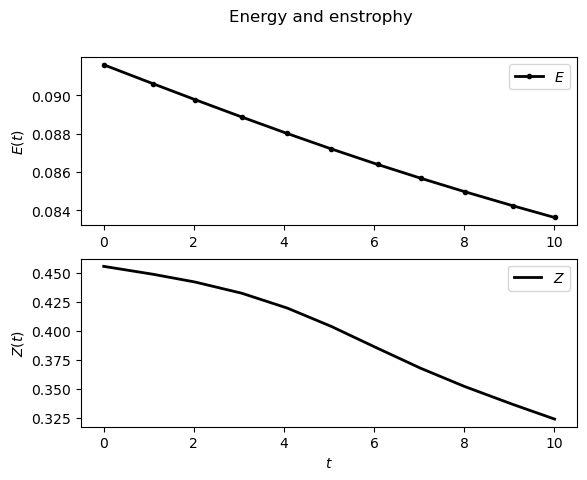

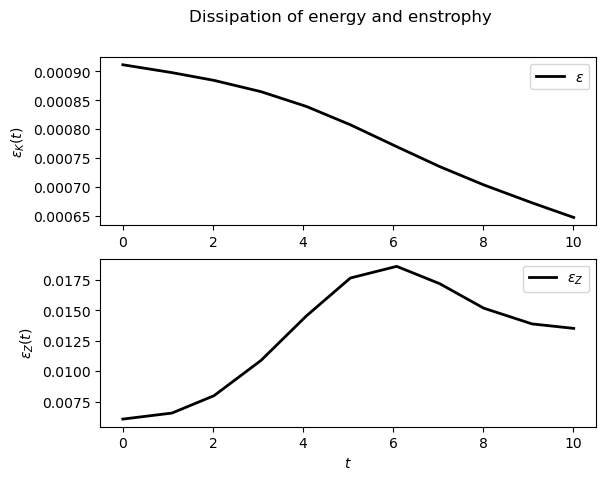

In [30]:
# time evolution of spacially averaged quanitites
sim.output.spatial_means.plot()

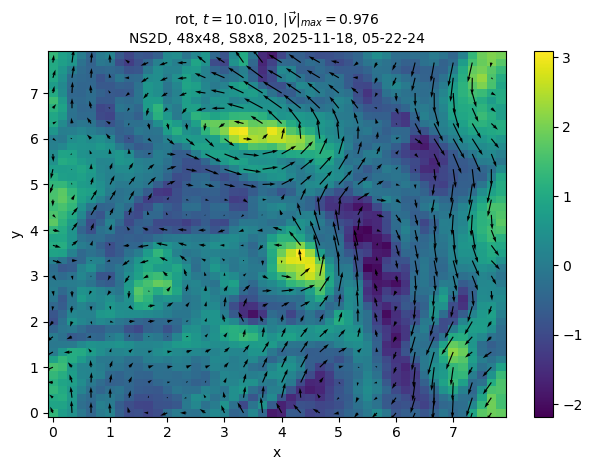

In [31]:
# final state
sim.output.phys_fields.plot()

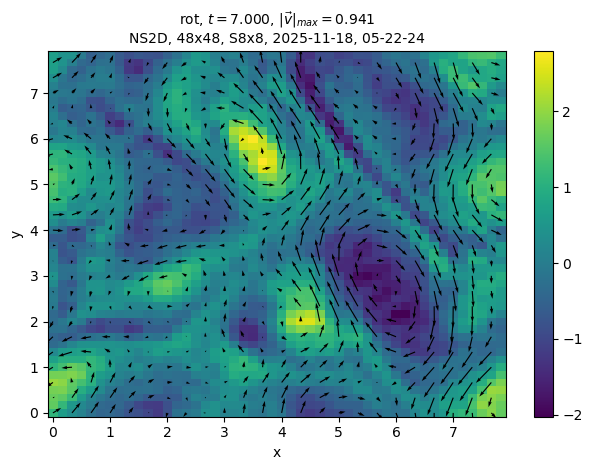

In [36]:
# at different times
sim.output.phys_fields.plot(time=7)

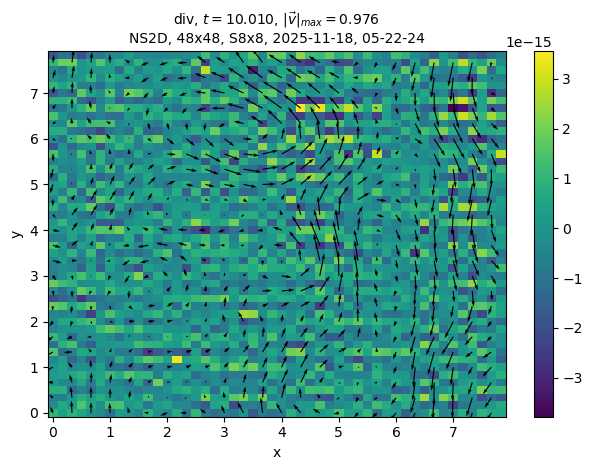

In [37]:
# plot variables that are not in the state?
sim.output.phys_fields.plot("div")

In [39]:
# remove directory of this example
shutil.rmtree(sim.output.path_run)